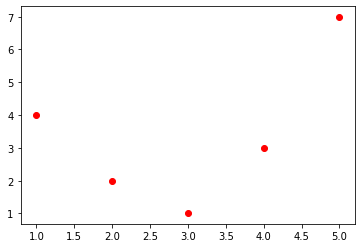

In [15]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

x = np.array([1, 2, 3, 4, 5])
y = np.array([4, 2, 1, 3, 7])

plt.scatter(x,y,c='red')

#### Podemos ajustar un modelo mas eficiente
        * Usando la transformacion de entradas

In [16]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

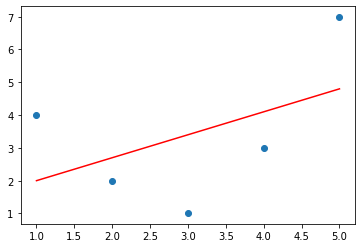

In [17]:
#usando el metodo simple, veamos si funciona
X=x[:,np.newaxis]
model=LinearRegression(fit_intercept=True)
model.fit(X,y)
yfit=model.predict(X)
plt.scatter(x,y)
plt.plot(x,yfit,color='red')


In [18]:
poly=PolynomialFeatures(degree=3,include_bias=False)
x2=poly.fit_transform(X)
x2

array([[  1.,   1.,   1.],
       [  2.,   4.,   8.],
       [  3.,   9.,  27.],
       [  4.,  16.,  64.],
       [  5.,  25., 125.]])

In [19]:
model=LinearRegression(fit_intercept=True).fit(x2,y)

yfit=model.predict(x2)

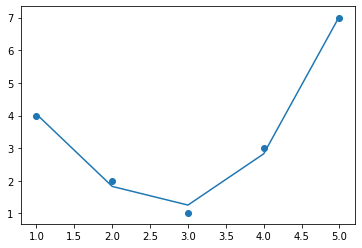

In [20]:
plt.scatter(x,y)
plt.plot(x,yfit)

In [23]:
##pero.. que nos hizo pensar que esos son los parametros adecuados?
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

In [24]:
#primero automatizamos el proceso de transformado de datos usando Pipeline (mas eficiente que make_pipeline())

pipe=Pipeline([
 ('polyfeatures',PolynomialFeatures()),
 ('linear',LinearRegression())

])

In [63]:
grid=GridSearchCV(
    estimator=pipe,
    param_grid=dict(polyfeatures__degree=list(range(1,22)),
                    linear__fit_intercept=[True,False]
                   ),
    cv=2
)

In [64]:
grid.fit(X,y)

GridSearchCV(cv=2, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('polyfeatures',
                                        PolynomialFeatures(degree=2,
                                                           include_bias=True,
                                                           interaction_only=False,
                                                           order='C')),
                                       ('linear',
                                        LinearRegression(copy_X=True,
                                                         fit_intercept=True,
                                                         n_jobs=None,
                                                         normalize=False))],
                                verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'linear__fit_intercept': [True, False],
                         'polyfeatures__degree': [1, 2, 3, 4

In [65]:
grid.best_params_

{'linear__fit_intercept': True, 'polyfeatures__degree': 3}

In [66]:
grid.best_estimator_

Pipeline(memory=None,
         steps=[('polyfeatures',
                 PolynomialFeatures(degree=3, include_bias=True,
                                    interaction_only=False, order='C')),
                ('linear',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

In [67]:
model=grid.best_estimator_

In [68]:
yfit=model.predict(X)

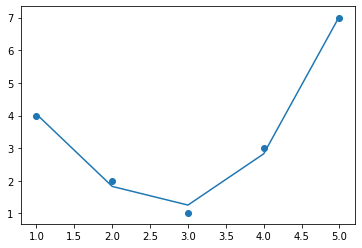

In [69]:
plt.scatter(x,y)
plt.plot(x,yfit)